In [2]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [3]:


trans = transforms.ToTensor() # ToTensor可以把PIL类型转换成32浮点数类型，同时将0-255的像素值均在0-1之间
mnist_train = torchvision.datasets.FashionMNIST(
    root= '.\\data',
    train=True, # 指定训练集/测试集
    transform=trans, # 我们要的是tensor而不是一堆图片
    download=True
)
mnist_test = torchvision.datasets.FashionMNIST(
    root='.\\data',
    train=False,
    transform=trans,
    download=True
)

len(mnist_train), len(mnist_test)

(60000, 10000)

In [4]:
print(mnist_train[0]) # mnist_train[i][0] 是图片具体内容（一个tensor），mnist_train[i][1]是其对应的label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

In [5]:
def get_fashion_mnist_labels(labels):
    # 返回Fashion-MNIST数据集的文本标签
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'sneaker', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    # 画出图像
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片tensor需要提出numpy
            ax.imshow(img.numpy())
        else:
            # PIL图片直接显示
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<AxesSubplot:title={'center':'bag'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'bag'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'shirt'}>,
       <AxesSubplot:title={'center':'bag'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

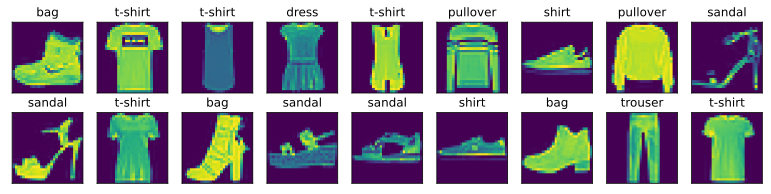

In [6]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))

In [9]:
batch_size = 256

train_iter = data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True) # num_workers指定用多少个进程来读数据，但是jupyter notebook多线程有点问题，这里不用

timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'4.19 sec'

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


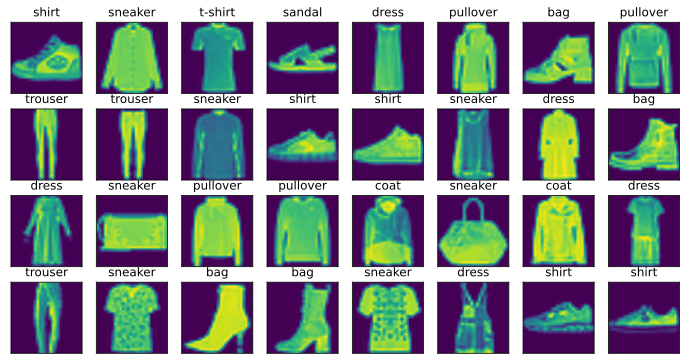

In [12]:
def load_data_fasion_mnist(batch_size, resize=None):
    '''
    下载数据集，并将其载入内存
    :param batch_size: 一次读多少个数据
    :param resize: 之后可能会需要更大的输入，因此放一个resize选项，具体参数是什么不太清楚
    :return:
    '''
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
    root= '.\\data',
    train=True, # 指定训练集/测试集
    transform=trans, # 我们要的是tensor而不是一堆图片
    download=True
    )
    mnist_test = torchvision.datasets.FashionMNIST(
        root='.\\data',
        train=False,
        transform=trans,
        download=True
    )
    return (data.DataLoader(mnist_train, batch_size, shuffle=True), data.DataLoader(mnist_test, batch_size, shuffle=True))

train_iter, test_iter = load_data_fasion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    show_images(X.reshape(32, 64, 64), 4, 8, titles=get_fashion_mnist_labels(y))
    break
